# Task 1 - Batch correction


In [20]:
import scanpy as sc

In [21]:
# DIFFERENT PER COMPUTER
data_path = '/Users/mincheolkim/Data/'
rna_filename = 'task1_input_rna.h5ad'

In [22]:
data_path + rna_filename

'/Users/mincheolkim/Data/task1_input_rna.h5ad'

In [23]:
adata = sc.read(data_path + rna_filename)

In [24]:
adata.obs.columns

Index(['orig.ident', 'nCount_RNA', 'nFeature_RNA', 'siccaid', 'pSS', 'ssa',
       'percent.mt', 'percent.ribo', 'PoolID', 'nCount_ADT', 'nFeature_ADT',
       'age', 'sex', 'b_tobacco', 'ssb', 'fs', 'fs_detailed', 'b_lymphoma',
       'b_systinvol', 'immune_meds', 'lympho'],
      dtype='object')

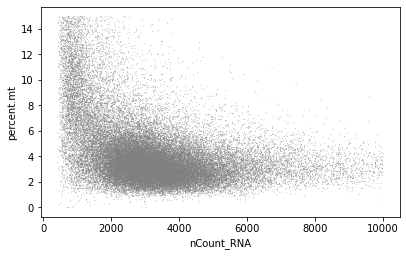

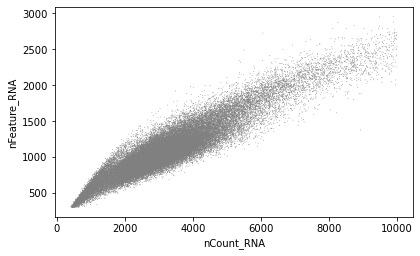

In [25]:
sc.pl.scatter(adata, x='nCount_RNA', y='percent.mt')
sc.pl.scatter(adata, x='nCount_RNA', y='nFeature_RNA')

In [26]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata.raw = adata


### Working only with highly variable genes

In [27]:
adata = adata[:, adata.var.highly_variable]


In [28]:
# sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])


In [29]:
sc.pp.scale(adata, max_value=10)


/Users/mincheolkim/opt/miniconda3/envs/single_cell/lib/python3.7/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/Users/mincheolkim/opt/miniconda3/envs/single_cell/lib/python3.7/site-packages/scanpy/preprocessing/_simple.py:843: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  view_to_actual(adata)


In [30]:
sc.tl.pca(adata, svd_solver='arpack')


In [ ]:
sc.pp.neighbors(adata, n_neighbors=50, n_pcs=25)


/Users/mincheolkim/opt/miniconda3/envs/single_cell/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
